In [1]:
from   data_viz_helpers import *
import matplotlib.pyplot as plt
import numpy as np
import ScraperFC as sfc
import seaborn as sns
import traceback

In [2]:
scraper = sfc.WhoScored()
try:
    match_data = scraper.scrape_match('https://www.whoscored.com/Matches/1602930/Live/International-World-Cup-Qualification-UEFA-2021-2022-Portugal-Turkey')
except:
    traceback.print_exc()
scraper.close()


In [3]:
home_ids = [player['playerId'] for player in match_data['matchCentreData']['home']['players']]
away_ids = [player['playerId'] for player in match_data['matchCentreData']['away']['players']]

In [4]:
home, away = list(), list()
for event in match_data['matchCentreData']['events']:
    if 'playerId' not in event.keys():
        continue
    elif event['playerId'] in home_ids:
        home.append([event['x']*130/100, event['y']*90/100])
    elif event['playerId'] in away_ids:
        away.append([(-event['x']+100) * 130/100, 
                     (-event['y']+100) * 90/100])
home, away = np.array(home), np.array(away)

In [5]:
EquipaCasa = match_data['matchCentreData']['home']['name']
EquipaCasa

EquipaFora = match_data['matchCentreData']['away']['name']
EquipaFora
Data = match_data['matchCentreData']['startTime']

In [6]:
EquipaCasa

'Portugal'

/Users/ruimarcelino/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ruimarcelino/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


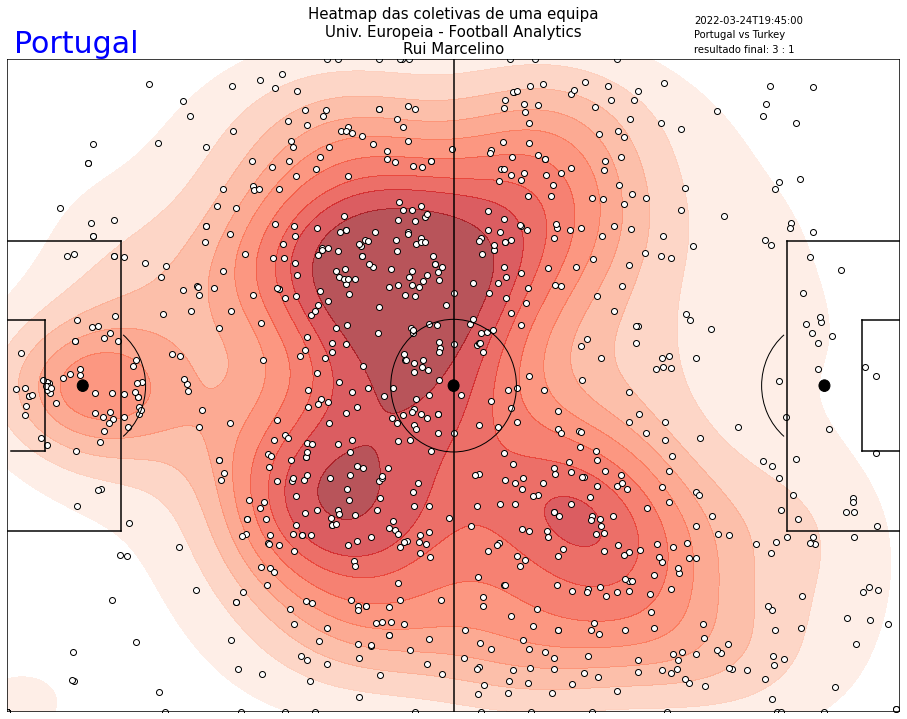

In [9]:
fig, ax = plt.subplots(figsize=[16,12])
x = home[:,0]
y = home[:,1]
ax = plot_field(ax)
ax = sns.kdeplot(x, y, clip=[[0,130], [0,90]], shade=True, shade_lowest=False, cmap='Reds', alpha=0.7)
ax.scatter(x, y, color='white', edgecolor='black')
ax.text(
    1, 91,
    match_data['matchCentreData']['home']['name'],
    fontsize=30,
    color='blue'
)
ax.text(
    100, 95,
    match_data['matchCentreData']['startTime'],
    fontsize=10,
    color='black'
)

ax.text(
    100, 93,
    match_data['matchCentreData']['home']['name']+' ' 'vs' ' ' +match_data['matchCentreData']['away']['name'],
    fontsize=10,
    color='black'
)
ax.text(
    100, 91,
    'resultado final'+': ' + match_data['matchCentreData']['score'],
    fontsize=10,
    color='black'
)

ax.set_title("Heatmap das coletivas de uma equipa\nUniv. Europeia - Football Analytics\nRui Marcelino", fontsize=15)
plt.show()
away_ax = ax
#save figure
fig.savefig(EquipaCasa+'_heatmap_'+Data+'.png', dpi=600)


/Users/ruimarcelino/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ruimarcelino/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


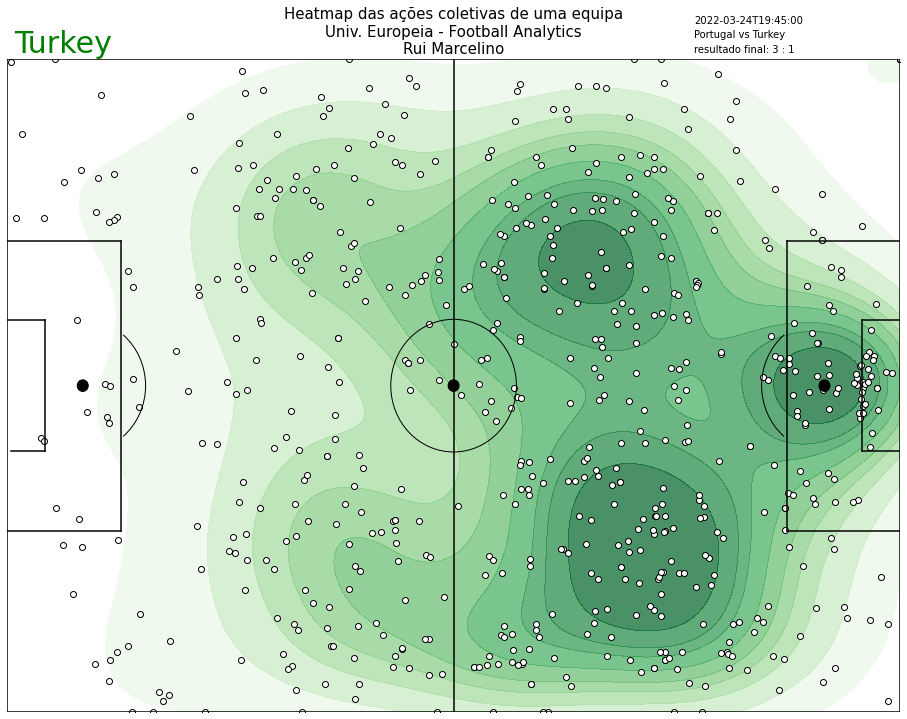

In [10]:
fig, ax = plt.subplots(figsize=[16,12])
x = away[:,0]
y = away[:,1]
ax = plot_field(ax)
ax = sns.kdeplot(x, y, clip=[[0,130], [0,90]], shade=True, shade_lowest=False, cmap='Greens', alpha=0.7)
ax.scatter(x, y, color='white', edgecolor='black')
ax.text(
    1, 91,
    match_data['matchCentreData']['away']['name'],
    fontsize=30,
    color='green'
)
ax.text(
    100, 95,
    match_data['matchCentreData']['startTime'],
    fontsize=10,
    color='black'
)

ax.text(
    100, 93,
    match_data['matchCentreData']['home']['name']+' ' 'vs' ' ' +match_data['matchCentreData']['away']['name'],
    fontsize=10,
    color='black'
)
ax.text(
    100, 91,
    'resultado final'+': ' + match_data['matchCentreData']['score'],
    fontsize=10,
    color='black'
)
ax.set_title("Heatmap das ações coletivas de uma equipa\nUniv. Europeia - Football Analytics\nRui Marcelino", fontsize=15)
plt.show()
away_ax = ax
#save figure
fig.savefig(EquipaFora+'_heatmap.png', dpi=600)


/Users/ruimarcelino/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ruimarcelino/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/ruimarcelino/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ruimarcelino/opt/anaconda3/lib/python3.8/site-packages/seaborn

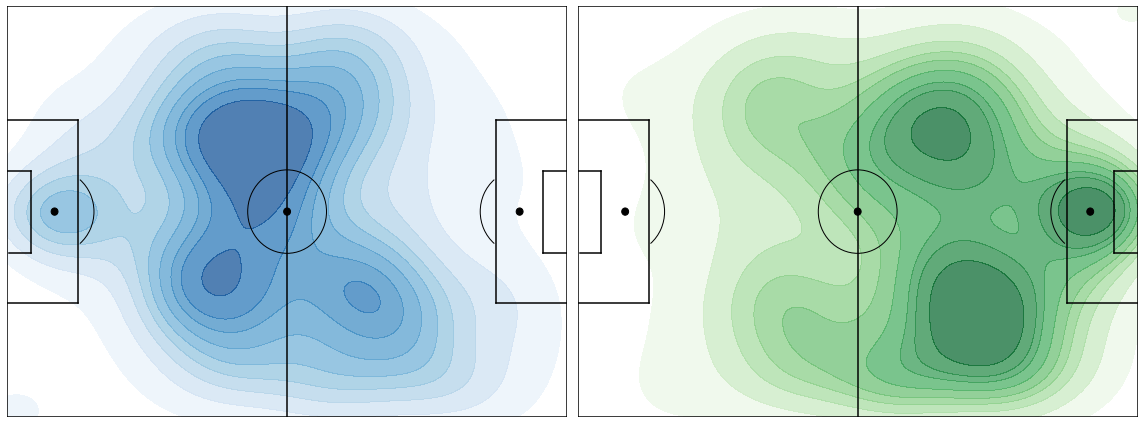

In [11]:
fig, axs = plt.subplots(figsize=[16,6], nrows=1, ncols=2)

axs[0] = plot_field(axs[0])
axs[0].axis('off')
axs[1] = plot_field(axs[1])

#### Home ####
x = home[:,0]
y = home[:,1]
axs[0] = sns.kdeplot(x, y, clip=[[0,130], [0,90]], shade=True, shade_lowest=False, cmap='Blues', alpha=0.7, ax=axs[0])
# axs[0].scatter(x, y, color='white', edgecolor='black')

#### Away ####
x = away[:,0]
y = away[:,1]
axs[1] = sns.kdeplot(x, y, clip=[[0,130], [0,90]], shade=True, shade_lowest=False, cmap='Greens', alpha=0.7, ax=axs[1])
# axs[1].scatter(x, y, color='white', edgecolor='black')

fig.tight_layout()
plt.show()
#save figure
fig.savefig(EquipaCasa+' ' + EquipaFora +' ' +'heatmap.png', dpi=600)